## This code calculates the volume of an ellipsoid from the dimensions generated in the folder describing the segmentation performed in a different folder of this repo.

In [18]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(stats)

In [5]:
# Define a function to compute the volume of an ellipsoid
volume_ellipsoid <- function(width, height, depth) {
  a <- width / 2
  b <- height / 2
  c <- depth / 2
  volume <- (4/3) * pi * a * b * c
  return(volume)
}

In [6]:
# Read the data from the CSV file
data <- read.csv("output_dimensions_mito_both.csv")

In [8]:
# Check if the necessary columns exist
if(!all(c("width", "height", "depth", "species") %in% names(data))) {
  stop("The CSV file must contain 'width', 'height', 'depth', and 'species' columns.")
}

# Calculate volumes
data$volume <- with(data, mapply(volume_ellipsoid, width, height, depth))

# save the cell volumes file
write.csv(data, file = "output_cell_volume.csv", row.names = FALSE)

In [16]:
head (data)

,Filename,depth,height,width,species,volume
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,processed_Cr_TAP_2x-PK_mito_chloro_032_C3_BGSub.segmentation.tiff,7.2,11.3595211,7.8309505,cr,335.3556449
2,processed_Cr_TAP_2x-PK_mito_chloro_007_C3_BGSub.segmentation.tiff,7.1,9.1773788,10.2142833,cr,348.4845476
3,processed_Cr_TAP_2x-PK_mito_chloro_028_C3_BGSub.segmentation.tiff,2.1,0.7892855,0.9749998,cr,0.8461679
4,processed_Cr_TAP_2x-PK_mito_chloro_024_C3_BGSub.segmentation.tiff,3.8,10.9416641,8.7130932,cr,189.6871683
5,processed_Cr_TAP_2x-PK_mito_chloro_011_C3_BGSub.segmentation.tiff,7.4,8.7440455,9.8273786,cr,332.9510899
6,processed_Cr_TAP_2x-PK_mito_chloro_016_C3_BGSub.segmentation.tiff,8.7,10.6476165,9.1154740,cr,442.1295412


### Create a plot, check normality of data, and compare the volumes computed for the two species

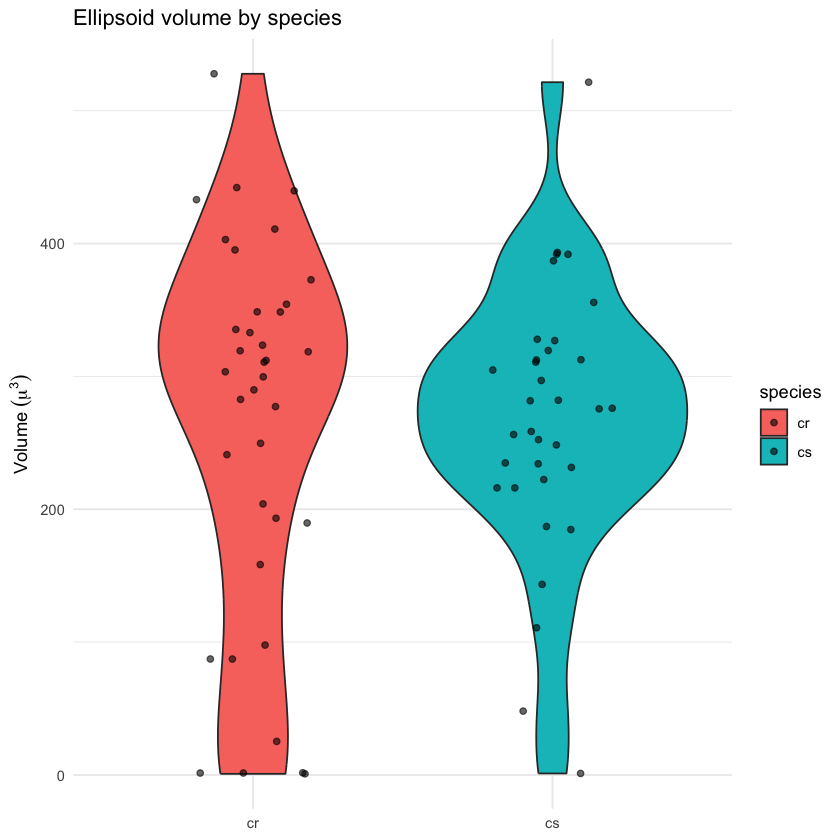

In [9]:
# Create the plot
p <- ggplot(data, aes(x = species, y = volume, fill = species)) +
  geom_violin() +
  geom_jitter(width = 0.2, alpha = 0.6) +  # Removed `position = position_jitter(width = 0.2)`
  labs(title = "Ellipsoid volume by species",
       x = NULL,
       y = expression(Volume ~ (mu^3))) +
  theme_minimal()

# Print the plot
print(p)

# Optional: Save the plot to a file
ggsave(filename = "ellipsoid_volume_by_species.png", plot = p, width = 10, height = 6)



	Shapiro-Wilk normality test

data:  volume_cr
W = 0.92826, p-value = 0.0198


	Shapiro-Wilk normality test

data:  volume_cs
W = 0.96163, p-value = 0.2711



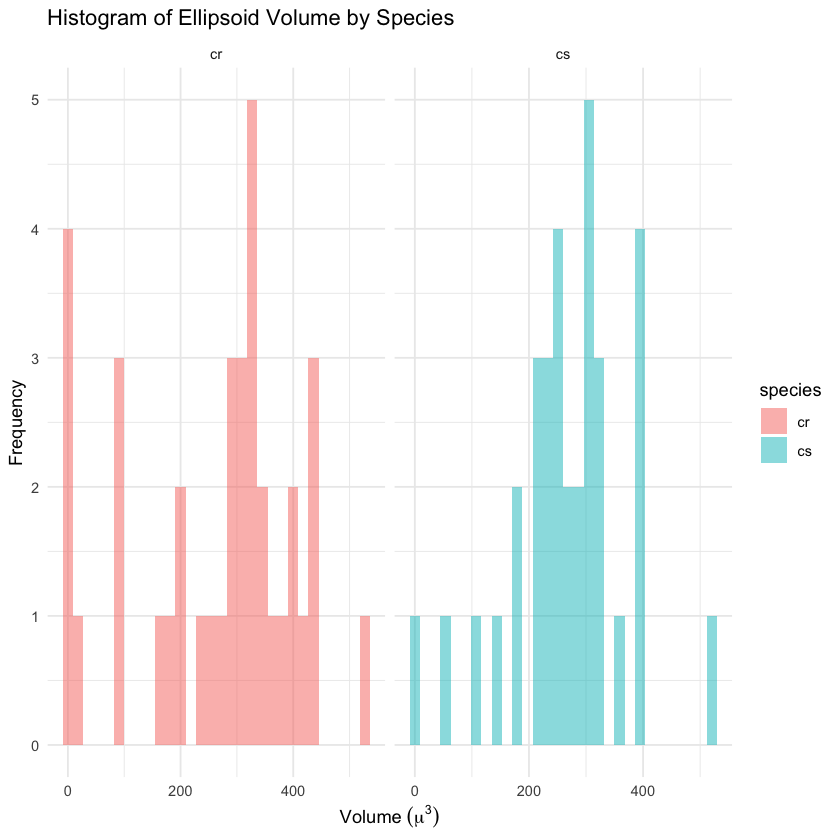

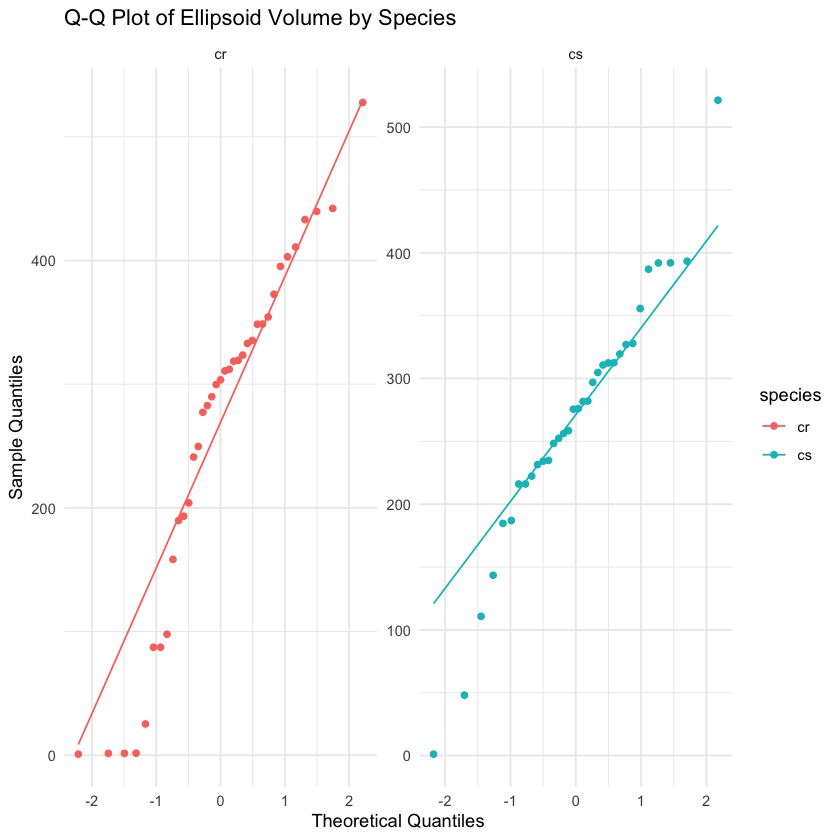

In [17]:
##
#Check normality of data
##

# Subset the volume data for each species
volume_cr <- data$volume[data$species == "cr"]
volume_cs <- data$volume[data$species == "cs"]

# Perform Shapiro-Wilk test
shapiro_test_cr <- shapiro.test(volume_cr)
shapiro_test_cs <- shapiro.test(volume_cs)

# Print the results
print(shapiro_test_cr)
print(shapiro_test_cs)

# Visual assessment using Histogram
p_hist <- ggplot(data, aes(x = volume, fill = species)) +
  geom_histogram(alpha = 0.5, position = 'identity', bins = 30) +
  facet_wrap(~ species, scales = "free_x") +
  labs(title = "Histogram of Ellipsoid Volume by Species",
       x = expression(Volume ~ (mu^3)),
       y = "Frequency") +
  theme_minimal()

print(p_hist)

# Visual assessment using Q-Q plot
p_qq <- ggplot(data, aes(sample = volume, color = species)) +
  stat_qq() +
  stat_qq_line() +
  facet_wrap(~ species, scales = "free") +
  labs(title = "Q-Q Plot of Ellipsoid Volume by Species",
       x = "Theoretical Quantiles",
       y = "Sample Quantiles") +
  theme_minimal()

print(p_qq)


### Since one of the two datasets did not pass normality test, a non-parametric test was used

In [19]:
##
# test whether species distributions differ using a Mann-Whitney U test
##
# Subset the volume data for each species
volume_cr <- data$volume[data$species == "cr"]
volume_cs <- data$volume[data$species == "cs"]

# Perform Mann-Whitney U Test
mann_whitney_test <- wilcox.test(volume_cr, volume_cs)

# Print the results
print(mann_whitney_test)

Warning message in wilcox.test.default(volume_cr, volume_cs):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  volume_cr and volume_cs
W = 679, p-value = 0.5688
alternative hypothesis: true location shift is not equal to 0

